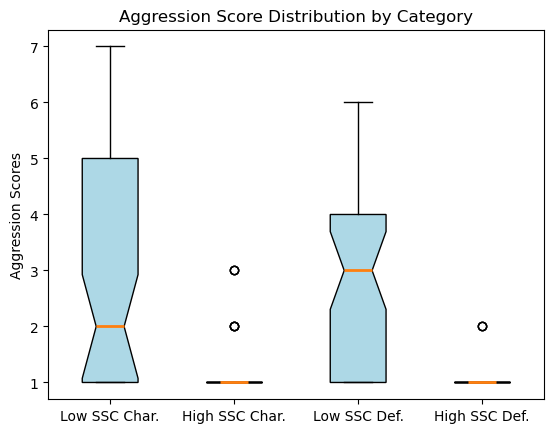

In [1]:
import pandas as pd
df = pd.read_csv("Report_Shorts_with_summary_stefan_provocation_experimentResults.csv")

import json
import re
def extract_json(row):
    try:
        # Find the first JSON-like structure in the row
        match = re.search(r'{.*?}', row)
        if match:
            json_str = match.group()
            return json.loads(json_str)  
    except json.JSONDecodeError:
        return None
    return None

# Apply the function to all Json Columns
df['low ssc defined'] = df['low ssc defined'].apply(extract_json)
df['high ssc defined'] = df['high ssc defined'].apply(extract_json)
df['low ssc characteristics'] = df['low ssc characteristics'].apply(extract_json)
df['high ssc characteristics'] = df['high ssc characteristics'].apply(extract_json) 

#Extract the aggression value from the JSON
df['low ssc characteristics'] = df['low ssc characteristics'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)
df['high ssc characteristics'] = df['high ssc characteristics'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)
df['low ssc defined'] = df['low ssc defined'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)
df['high ssc defined'] = df['high ssc defined'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)

import matplotlib.pyplot as plt

columns_to_plot = ['low ssc characteristics', 'high ssc characteristics', 'low ssc defined', 'high ssc defined']

# Prepare data for the box plot
data_to_plot = [df[col].dropna() for col in columns_to_plot]

fig, ax = plt.subplots()

bp = ax.boxplot(data_to_plot, patch_artist=True, notch=True, medianprops={'linewidth': 2})

colors = ['lightblue', 'lightgreen', 'lightblue', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Adding labels
ax.set_xticklabels(['Low SSC Char.', 'High SSC Char.', 'Low SSC Def.', 'High SSC Def.'])
ax.set_ylabel('Aggression Scores')
ax.set_title('Aggression Score Distribution by Category')

plt.show()